In [7]:
import liionpack as lp
import numpy as np
import matplotlib.pyplot as plt
import pybamm

plt.close("all")


# Define parameters
Np = 1
Ns = 3

# Generate netlist
netlist = lp.setup_circuit(Np=Np, Ns=Ns, Rb=1.5e-4, Rc=2e-2, Ri=5e-2, V=4.0, I=2.0)


I_map = netlist["desc"].str.find("I") > -1
Terminal_Node = np.array(netlist[I_map].node1)[0]

V_node, I_batt, terminal_voltage, terminal_current, terminal_power = (
    lp.solve_circuit_vectorized(netlist, current=None, power=80.0)
)

print(
    "Terminal voltage [V]:",
    terminal_voltage,
)
print(
    "Current [A]:",
    terminal_current,
)
print(
    "Power [W]:",
    terminal_power,
)

Terminal voltage [V]: [7.70587081]
Current [A]: [10.38161301]
Power [W]: [79.99936866]


In [8]:
# Cycling experiment
experiment = pybamm.Experiment(
    [("Discharge at 55.0 W for 1000 s or until 3.3 V",)],
    period="10 s",
)
parameter_values = pybamm.ParameterValues("Chen2020")
output_variables = ["Terminal voltage [V]", "Current [A]", "Power [W]"]
# Solve pack
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    output_variables=output_variables,
    initial_soc=1.0,
)

Stepping simulation: 100%|██████████| 101/101 [00:00<00:00, 172.48it/s]


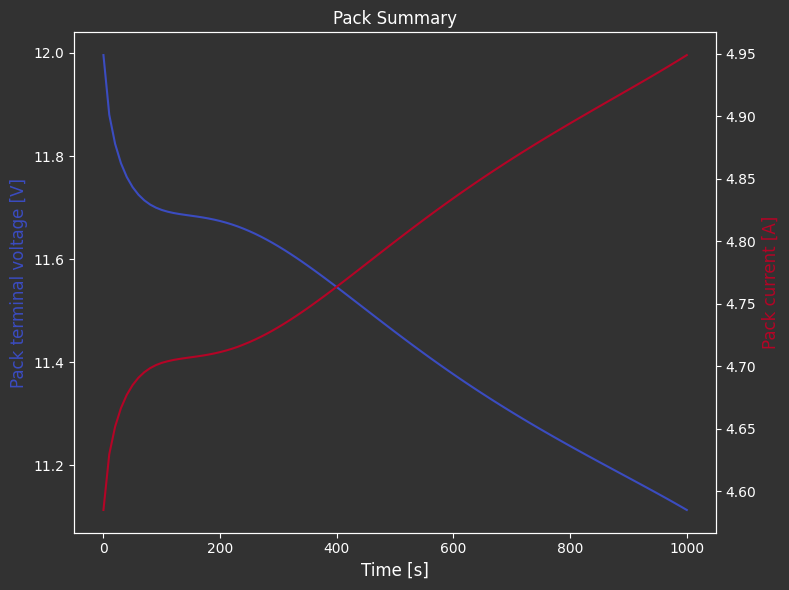

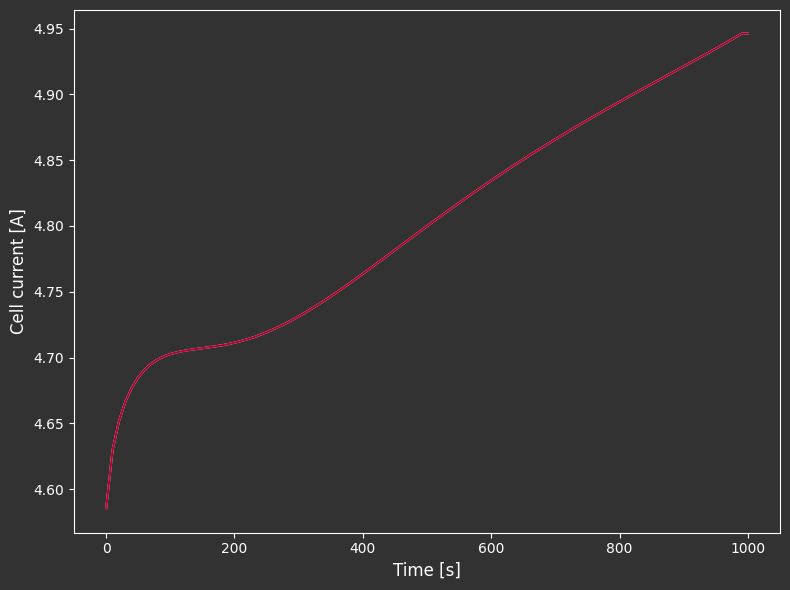

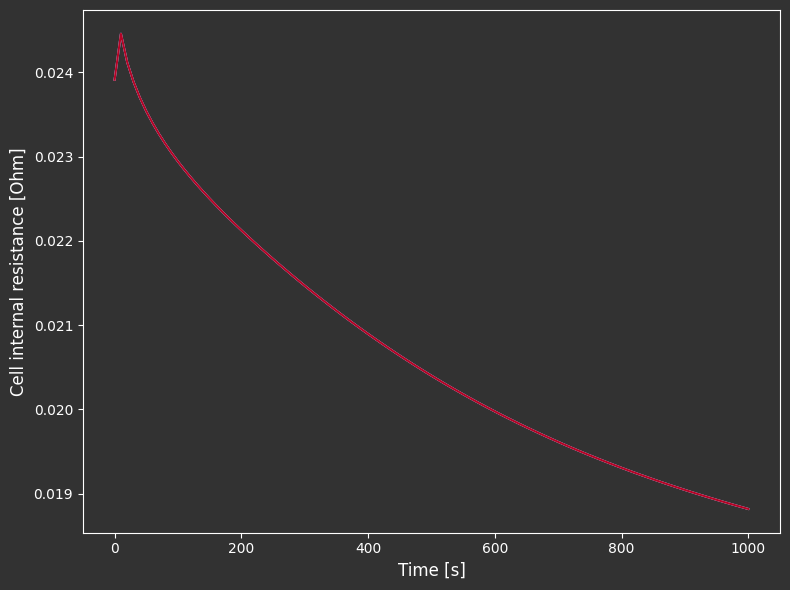

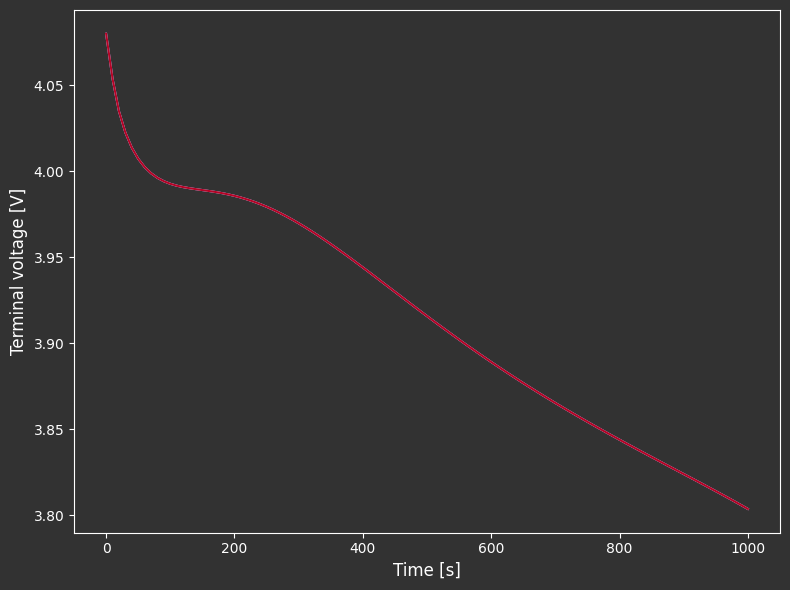

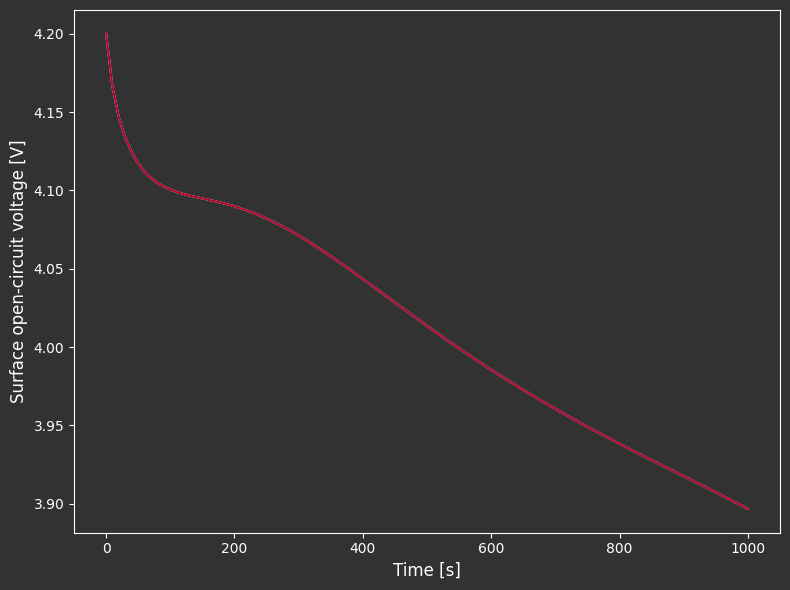

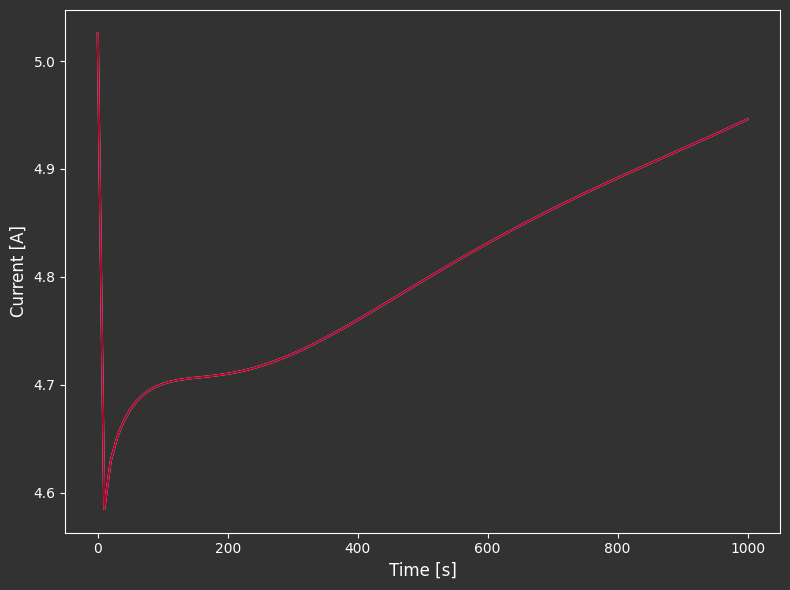

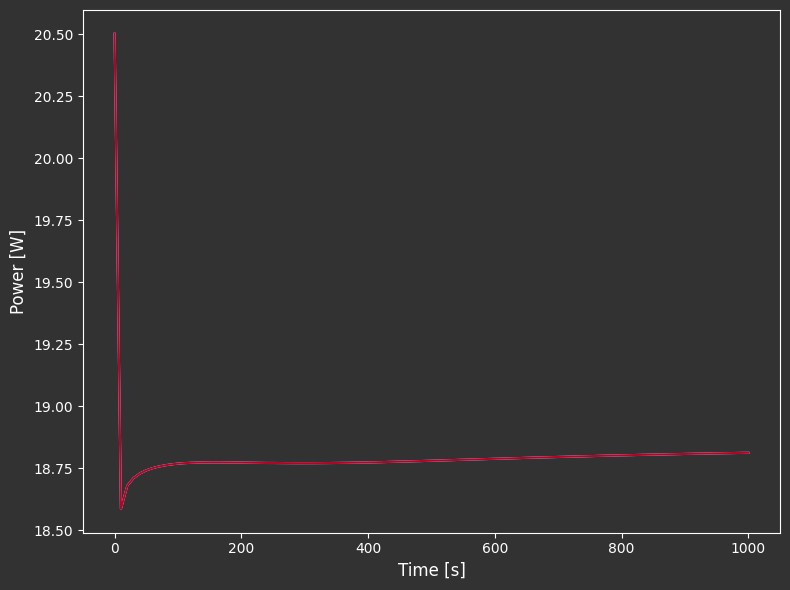

In [9]:
lp.plot_output(output)
plt.show()